# Regression Tree

###### https://towardsdatascience.com/regression-tree-in-python-from-scratch-9b7b64c815e3

Y = f(X)


Note: you may need to restart the kernel to use updated packages.


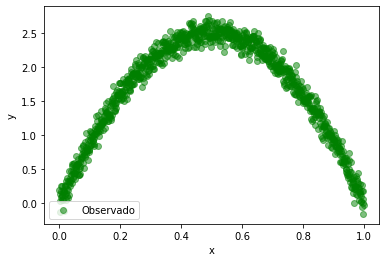

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


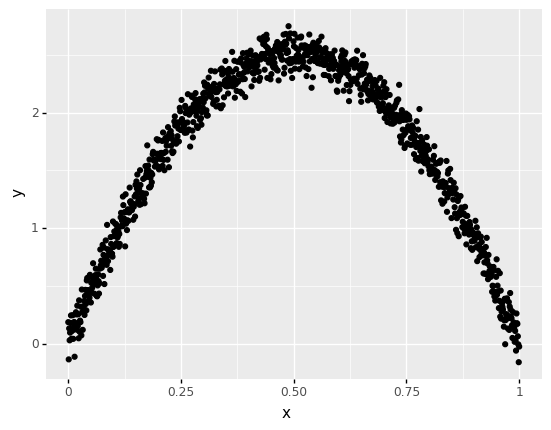

<ggplot: (156076182950)>

In [2]:
%pip install plotnine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *

# Gerando os dados
# x é uma sequencia de valores entre 0 e 1
x = np.linspace(start=0, stop=1, num=1000)
# y segue uma relação quadrática
a = 0
b = 10
c = -10


y = a + b*x + c*x**2 + np.random.normal(size=len(x), loc=0, scale=0.1)

df = pd.DataFrame({'x':x, 'y':y})


plt.scatter(x, y, c="g", alpha=0.5,label="Observado")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower left')
plt.show()

p = ggplot(aes(x='x', y='y'), df)
p = p + geom_point()
p+  scale_color_cmap(cmap_name='viridis') + theme()

#ggplot(df, aes(x,y)) + 
#  geom_point(aes(colour='Observado')) +
#  scale_color_viridis(discrete=TRUE, begin=0, end=.85, name = "Valor") +
#  theme(legend.position="bottom",
#        legend.spacing.x = unit(0, 'cm'))

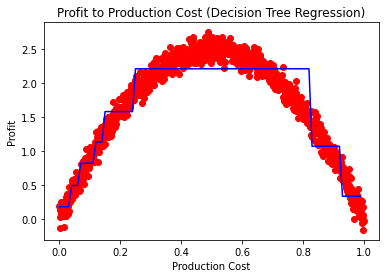

[Text(167.4, 190.26, 'X[0] <= 0.149\nmse = 0.57\nsamples = 1000\nvalue = 1.668'),
 Text(83.7, 135.9, 'X[0] <= 0.07\nmse = 0.136\nsamples = 149\nvalue = 0.661'),
 Text(41.85, 81.53999999999999, 'X[0] <= 0.037\nmse = 0.037\nsamples = 70\nvalue = 0.328'),
 Text(20.925, 27.180000000000007, 'mse = 0.016\nsamples = 37\nvalue = 0.18'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 0.009\nsamples = 33\nvalue = 0.494'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 0.115\nmse = 0.037\nsamples = 79\nvalue = 0.957'),
 Text(104.625, 27.180000000000007, 'mse = 0.016\nsamples = 45\nvalue = 0.822'),
 Text(146.475, 27.180000000000007, 'mse = 0.01\nsamples = 34\nvalue = 1.135'),
 Text(251.10000000000002, 135.9, 'X[0] <= 0.826\nmse = 0.437\nsamples = 851\nvalue = 1.845'),
 Text(209.25, 81.53999999999999, 'X[0] <= 0.246\nmse = 0.131\nsamples = 677\nvalue = 2.12'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 0.039\nsamples = 97\nvalue = 1.581'),
 Text(230.175, 27.180000000000007, '

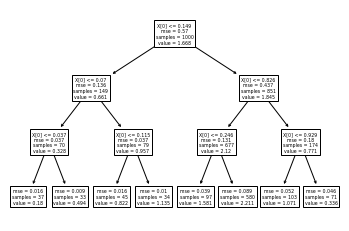

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Fit regression model
regr = DecisionTreeRegressor(max_depth=3, ccp_alpha=0)
clf = regr.fit(x.reshape(-1,1), y)


# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(x), max(x), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(x, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regr.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Production Cost')
  
# specify Y axis label
plt.ylabel('Profit')
  
# show the plot
plt.show()

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

# Construindo a árvore #
#tree <- rpart(y~x, 
#              data=df,
#              control=rpart.control(maxdepth = 3, cp=0))


# Kfold

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [2]:
from sklearn import tree
df_titanic=sns.load_dataset('titanic') 

genders = {"male": 0, "female": 1}
alive = {"no": 0, "yes": 1}
df_titanic['sex'] = df_titanic['sex'].map(genders)
df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)
df_titanic['fare'].fillna(df_titanic['fare'].mean(), inplace=True)

clf = tree.DecisionTreeClassifier(criterion='gini') 
X = df_titanic.drop(['survived','who','class','deck','embarked','embark_town','alive'],axis=1)
y = df_titanic['survived']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

model = clf.fit(X_train,y_train)


In [1]:
# Import scikit-learn libraries
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# create the range 1 to 25
rn = range(1,26)

In [3]:
# to demonstrate how the data are split, we will create 3 and 5 folds. 
# KFold function has to be applied on the data and it returns an location (index) of the train and test samples.
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [4]:
# Let's split our test range into 5 and3  folds and display the splits on the chart.
# In order to clearly show which data belongs to each set, we will shift the values by -.1 and +.1
# the first fold will contain values 0.9 in train and 1.1 in the test set, second 1.9 and 2.1, etc.
# we will also give each sets the different color
# because we will repeat this exercise for the shuffled version, let's create a function 

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

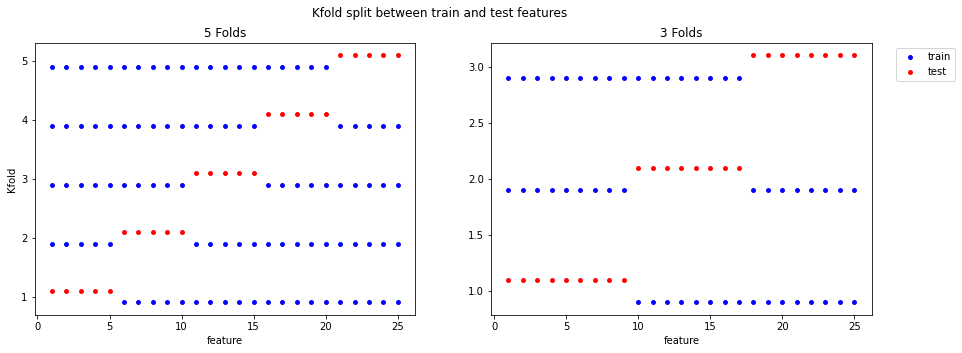

In [5]:
train5, test5 = kfoldize(kf5,rn)
train3, test3 = kfoldize(kf3,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train5)
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test5)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train3)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test3)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[1].set_xlabel("feature")
ax[0].set_title("5 Folds")
ax[1].set_title("3 Folds")
plt.suptitle("Kfold split between train and test features")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()